# 📌 결정 트리

### 1.결정 트리 예제 - 붓꽃 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 데이터 불러오기

In [2]:
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# 데이터프레임으로 변환
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### 1.2 학습,테스트 데이터 세트 분리

In [4]:
# 학습, 테스트 데이터 세트로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2,
                                                    random_state=11)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


#### 1.3 Decision Tree 생성 및 학습

In [5]:
# Decision Tree 생성
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=156)

# Decision Tree 학습
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

#### 1.4 시각화

In [25]:
# Graphviz 시각화 파일 저장
from sklearn.tree import export_graphviz

export_graphviz(clf, 
                out_file="tree.dot",                    # 파일 이름과 형식 지정
                class_names=iris_data.target_names,     # 클래스 이름 지정
                impurity=True,                          # 각 노드의 불순도
                filled=True)                            # 노드의 시각화 시 색상을 사용하여 노드의 순도

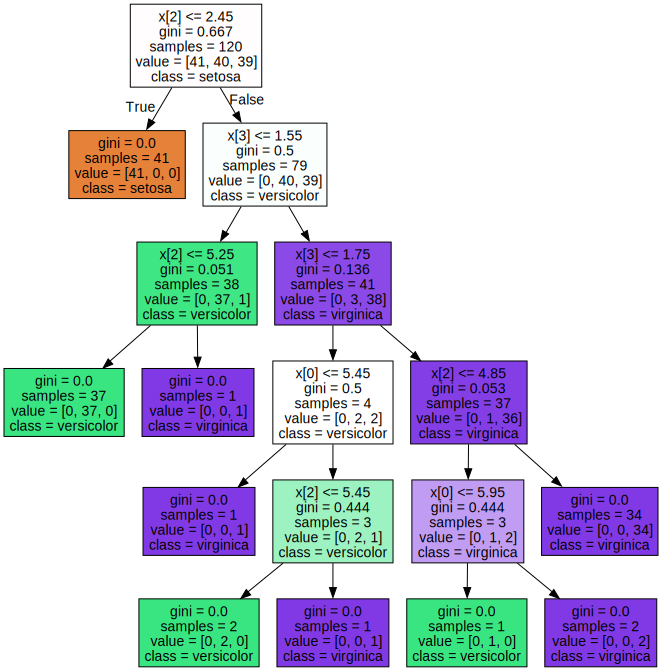

In [6]:
# Graphviz 시각화 파일 읽기
import graphviz

with open("./tree.dot") as f:
    graph = f.read()

graphviz.Source(graph)

### 2.파라미터 적용 

#### 2.1 max_depth = 3

In [9]:
# Decision Tree 생성
from sklearn.tree import DecisionTreeClassifier

clf_para1 = DecisionTreeClassifier(random_state=156,
                             max_depth=3)

# Decision Tree 학습
clf_para1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [10]:
# Graphviz 시각화 파일 저장
from sklearn.tree import export_graphviz

export_graphviz(clf_para1, 
                out_file="tree_para1.dot",                    # 파일 이름과 형식 지정
                class_names=iris_data.target_names,     # 클래스 이름 지정
                impurity=True,                          # 각 노드의 불순도
                filled=True)                            # 노드의 시각화 시 색상을 사용하여 노드의 순도

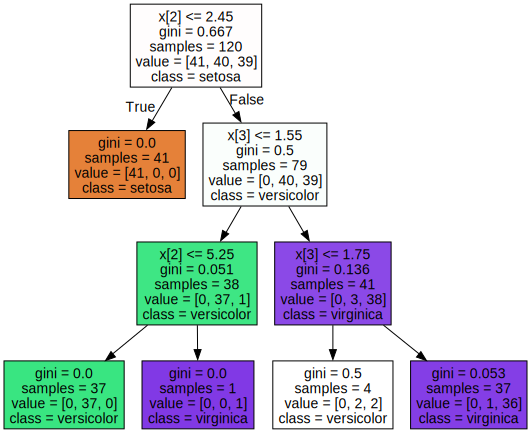

In [11]:
# Graphviz 시각화 파일 읽기
import graphviz

with open("./tree_para1.dot") as f:
    graph = f.read()

graphviz.Source(graph)

#### 2.2 min_samples_split = 4

In [12]:
# Decision Tree 생성
from sklearn.tree import DecisionTreeClassifier

clf_para2 = DecisionTreeClassifier(random_state=156,
                                    min_samples_split=4)

# Decision Tree 학습
clf_para2.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

In [13]:
# Graphviz 시각화 파일 저장
from sklearn.tree import export_graphviz

export_graphviz(clf_para2, 
                out_file="tree_para2.dot",                    # 파일 이름과 형식 지정
                class_names=iris_data.target_names,     # 클래스 이름 지정
                impurity=True,                          # 각 노드의 불순도
                filled=True)                            # 노드의 시각화 시 색상을 사용하여 노드의 순도

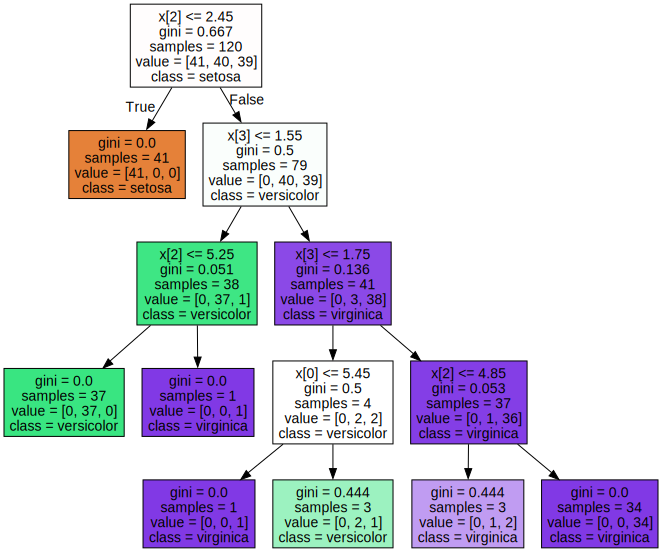

In [14]:
# Graphviz 시각화 파일 읽기
import graphviz

with open("./tree_para2.dot") as f:
    graph = f.read()

graphviz.Source(graph)

#### 2.3 min_samples_leaf = 4

In [15]:
# Decision Tree 생성
from sklearn.tree import DecisionTreeClassifier

clf_para3 = DecisionTreeClassifier(random_state=156,
                                    min_samples_leaf=4)

# Decision Tree 학습
clf_para3.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=156)

In [16]:
# Graphviz 시각화 파일 저장
from sklearn.tree import export_graphviz

export_graphviz(clf_para3, 
                out_file="tree_para3.dot",                    # 파일 이름과 형식 지정
                class_names=iris_data.target_names,     # 클래스 이름 지정
                impurity=True,                          # 각 노드의 불순도
                filled=True)                            # 노드의 시각화 시 색상을 사용하여 노드의 순도

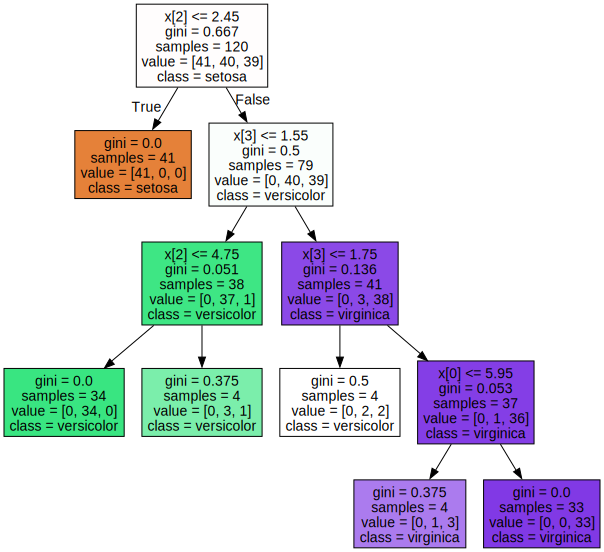

In [17]:
# Graphviz 시각화 파일 읽기
import graphviz

with open("./tree_para3.dot") as f:
    graph = f.read()

graphviz.Source(graph)

### 3. 추가 데이터 분석

#### 3.1 Feature importances(특성 중요도)

In [19]:
# feature importance 추출
print("Feature importance:\n{0}".format(np.round(clf.feature_importances_,3)))
print("---" * 20)

# feature importance 매칭
for name, value in zip(iris_data.feature_names, clf.feature_importances_):
    print("{0} : {1:.3f}".format(name, value))

Feature importance:
[0.    0.    0.558 0.442]
------------------------------------------------------------
sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.558
petal width (cm) : 0.442


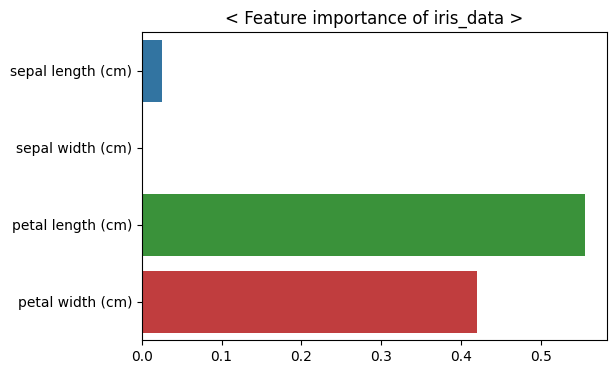

In [71]:
# feature importance를 column 별로 시각화

plt.figure(figsize=(6,4))
sns.barplot(x=clf.feature_importances_, y=iris_data.feature_names)

plt.title("< Feature importance of iris_data >")

plt.show()

#### 3.2 결정 트리 과적합(Overfitting)

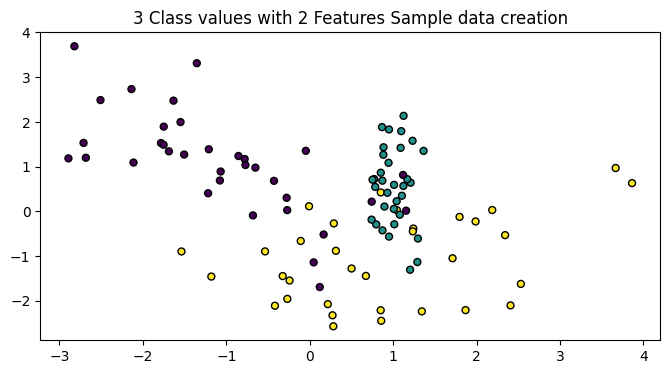

In [70]:
from sklearn.datasets import make_classification

plt.figure(figsize=(8,4))
plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2,            # 생성할 특성의 수
                                           n_redundant=0,           # 불필요한 특성의 수
                                           n_informative=2,         # 유용한 특성의 수
                                           n_classes=3,             # 클래스의 수
                                           n_clusters_per_class=1,  # 각 클래스당 클러스트의 수
                                           random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:,0], X_features[:,1], 
            marker="o", c=y_labels,             # 마커 모양 지정, 데이터 포인트의 색상(y_labels에 따른 색상 설정)
            s=25, edgecolors="k")               # 각 데이터 포인트의 크기, 마커의 테두리 색상(black)

plt.show()

In [73]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_65861/3405843115.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


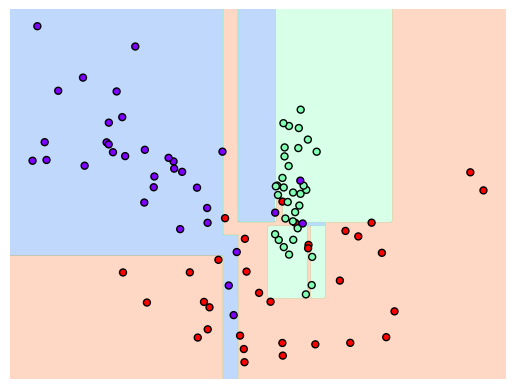

In [74]:
# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
clf = DecisionTreeClassifier(random_state=156)

clf.fit(X_features, y_labels)
visualize_boundary(clf, X_features, y_labels)

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_65861/3405843115.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


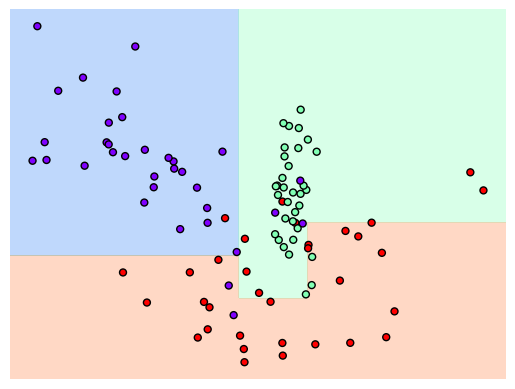

In [75]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(clf, X_features, y_labels)

----